<a href="https://colab.research.google.com/github/BLoux/Hw1/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for Final Project: Predictive Modeling for the S&P 500 Movements
Name: Baileigh Loux
B#: B00097338



Linear Regression Model for S&P 500



In [ ]:
#Step 1: import pachages and data file to be able to do EDA
#Data Source C:\Users\saeyo\Downloads\sp500 prediction.csv
!pip sklearn.preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sp500.csv',  header = None)


ERROR: unknown command "sklearn.preprocessing"


Variable Name Description
Date, Open, High, Low, Close, Volume

Exploratory Data Analysis

In [ ]:
df.head()
#put appropriate column names for our column
column_names = ["Date", "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]
df.columns = column_names
columns_to_drop = ["Dividends", "Stock Splits"]
df = df.drop(columns=columns_to_drop, axis=1)
print(df.head())

         Date                Open                High                 Low  \
0        Date                Open                High                 Low   
1  1950-01-03   16.65999984741211   16.65999984741211   16.65999984741211   
2  1950-01-04  16.850000381469727  16.850000381469727  16.850000381469727   
3  1950-01-05   16.93000030517578   16.93000030517578   16.93000030517578   
4  1950-01-06  16.979999542236328  16.979999542236328  16.979999542236328   

                Close   Volume  
0               Close   Volume  
1   16.65999984741211  1260000  
2  16.850000381469727  1890000  
3   16.93000030517578  2550000  
4  16.979999542236328  2010000  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18293 entries, 0 to 18292
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          18293 non-null  object
 1   Open          18293 non-null  object
 2   High          18293 non-null  object
 3   Low           18293 non-null  object
 4   Close         18293 non-null  object
 5   Volume        18293 non-null  object
 6   Dividends     18293 non-null  object
 7   Stock Splits  18293 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [ ]:
#finding the shape of the file
num_rows = df.shape[0]  # Number of rows
num_columns = df.shape[1]  # Number of columns

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 18292
Number of columns: 7


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,18293,18293,18293,18293,18293,18293,18293,18293
unique,18293,11839,14954,14950,14949,12530,2,2
top,Date,0.0,102.6500015258789,100.80999755859375,67.9000015258789,2180000,0,0
freq,1,5075,8,7,7,23,18292,18292


In [ ]:
#Check for missing values
(df.isna() == True).sum().sum()

0

Step 2: Reprocess the Data

In [ ]:
categorical_columns = []
numerical_columns = []
for col in df.columns:
  if df[col].dtype == "object":
    categorical_columns.append(col)
  else:
    numerical_columns.append(col)
#numerical_columns.pop()
print(categorical_columns, numerical_columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume'] []


In [ ]:
df.head()
pd.set_option('display.max_rows', 18292)  # Change to the desired number of rows
print(df)

             Date                Open                High                 Low  \
0            Date                Open                High                 Low   
1      1950-01-03   16.65999984741211   16.65999984741211   16.65999984741211   
2      1950-01-04  16.850000381469727  16.850000381469727  16.850000381469727   
3      1950-01-05   16.93000030517578   16.93000030517578   16.93000030517578   
4      1950-01-06  16.979999542236328  16.979999542236328  16.979999542236328   
...           ...                 ...                 ...                 ...   
18288  2022-09-06   3930.889892578125   3942.550048828125             3886.75   
18289  2022-09-07   3909.429931640625   3987.889892578125   3906.030029296875   
18290  2022-09-08    3959.93994140625              4010.5    3944.81005859375   
18291  2022-09-09    4022.93994140625    4076.81005859375    4022.93994140625   
18292  2022-09-12      4083.669921875    4119.27978515625      4083.669921875   

                    Close  

Build and Train LInear regression Model

In [ ]:
#Step 3
#Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Extract features (X) and target variable (y)
features = ["Open", "High", "Low", "Volume"]
target = "Close"

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features if needed (optional but can be beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_test_scaled, x_train_scaled

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R-squared value
r_squared = r2_score(y_test, predictions)

print(f"R-squared value: {r_squared}")

# Make predictions on the test set
#predictions = model.predict(X_test_scaled)
#y_pred_linear = model.predict(x_test_scaled)

# 1. Extract the features for prediction
features_for_prediction = df[["Open", "High", "Low", "Volume"]]

# 2. Scale Features (if necessary)
# Use the same scaler object used during training
features_for_prediction_scaled = scaler.transform(features_for_prediction)

# 3. Make Predictions
df["Predicted_Close"] = model.predict(features_for_prediction_scaled)

# Display the DataFrame with the predicted closing prices
print(df[["Date", "Close", "Predicted_Close"]])




Streaming output truncated to the last 5000 lines.
13293 2002-10-31    885.760009765625       888.894124
13294 2002-11-01   900.9600219726562       889.884551
13295 2002-11-04   908.3499755859375       912.376226
13296 2002-11-05   915.3900146484375       910.413441
13297 2002-11-06    923.760009765625       914.906262
13298 2002-11-07   902.6500244140625       910.314358
13299 2002-11-08    894.739990234375       900.462942
13300 2002-11-11   876.1900024414062       883.976175
13301 2002-11-12   882.9500122070312       885.008555
13302 2002-11-13    882.530029296875       881.778987
13303 2002-11-14     904.27001953125       893.042587
13304 2002-11-15   909.8300170898438       902.563710
13305 2002-11-18   900.3599853515625       907.365699
13306 2002-11-19    896.739990234375       899.173505
13307 2002-11-20   914.1500244140625       904.667079
13308 2002-11-21    933.760009765625       924.540694
13309 2002-11-22   930.5499877929688       933.028598
13310 2002-11-25   932.86999511

In [22]:
#Visualizing the Data of predictive vs actual closing prices
#Tried to make this a graph to visualize but I wasn't able to get it to run properly

import matplotlib.pyplot as plt

# Extract features for prediction
features_for_prediction = df[["Open", "High", "Low", "Volume"]]

# Scale features if necessary
features_for_prediction_scaled = scaler.transform(features_for_prediction)

# Make predictions
df["Predicted_Close"] = model.predict(features_for_prediction_scaled)

# Display DataFrame with predicted closing prices
print(df[["Date", "Close", "Predicted_Close"]])
# Plotting the actual closing prices
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Actual Closing Price", marker='o')

# Plotting the predicted closing prices
plt.plot(df["Date"], df["Predicted_Close"], label="Predicted Closing Price", linestyle='dashed', marker='o')

# Adding labels and title
plt.xlabel("Date")
plt.title("Actual vs. Predicted Closing Prices")
plt.legend()

# Removing y-axis labels
plt.yticks([])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


KeyError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Tomorrow's Close Price: 4103.644842363021


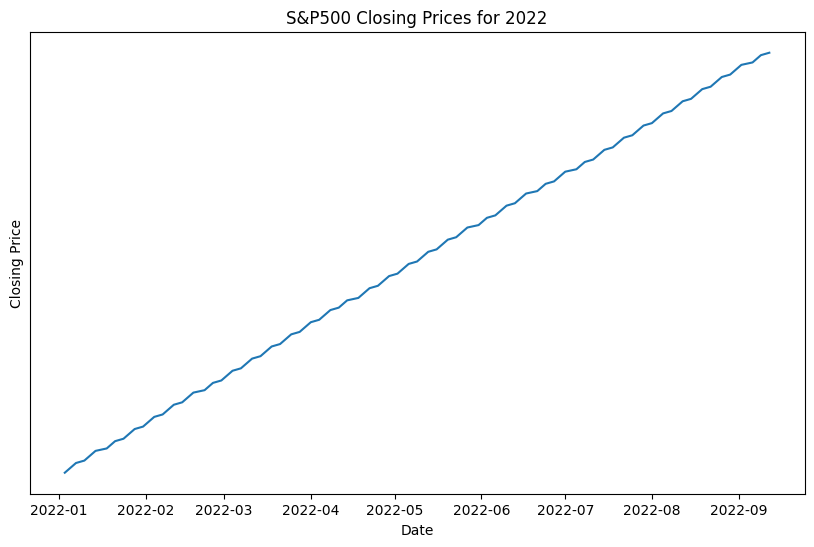

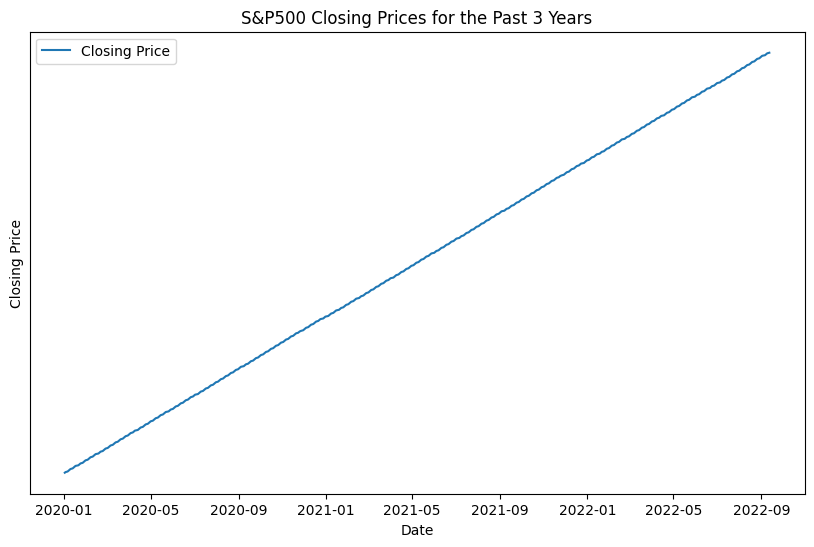

In [ ]:
#Using the predictive model to try and predict a future date, in this case, tomorrow
# 1. Extract the latest data (latest date)
latest_data = df.iloc[-1][["Open", "High", "Low", "Volume"]]

# 2. Scale the features
latest_data_scaled = scaler.transform([latest_data])

# 3. Make the prediction
predicted_price = model.predict(latest_data_scaled)

# The 'predicted_price' now contains the predicted closing price for tomorrow
print(f"Predicted Tomorrow's Close Price: {predicted_price[0]}")

# Select data for a specific year (e.g., 2022)
selected_year = 2022
selected_data = df[df['Date'].dt.year == selected_year]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(selected_data['Date'], selected_data['Close'], label='Closing Price')
plt.title(f'S&P500 Closing Prices for {selected_year}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.yticks([])  # Remove y-axis labels
#plt.legend()
#plt.show()

# Filter data for the past 3 years
current_year = pd.Timestamp.now().year
start_year = current_year - 3
selected_data = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= current_year)]

# Plotting the data without y-axis labels
plt.figure(figsize=(10, 6))
plt.plot(selected_data['Date'], selected_data['Close'], label='Closing Price')
plt.title(f'S&P500 Closing Prices for the Past 3 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.yticks([])  # Remove y-axis labels
plt.legend()
plt.show()

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the date
df['Year'] = df['Date'].dt.year



In [ ]:
#Check IV/features
x.head()

,Date,Open,High,Low,Close,Volume
1,1950-01-03,16.65999984741211,16.65999984741211,16.65999984741211,16.65999984741211,1260000
2,1950-01-04,16.850000381469727,16.850000381469727,16.850000381469727,16.850000381469727,1890000
3,1950-01-05,16.93000030517578,16.93000030517578,16.93000030517578,16.93000030517578,2550000
4,1950-01-06,16.979999542236328,16.979999542236328,16.979999542236328,16.979999542236328,2010000
5,1950-01-09,17.079999923706055,17.079999923706055,17.079999923706055,17.079999923706055,2520000


Step 5: Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Make preictions using the test-data

y_pred_linear = model.predict(X_test)

#Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

#Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", round(rmse,2))

#Calculate Mean ABsolute Error
mae = mean_absolute_error(y_test, y_pred_linear)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 38.376326937401124
Root Mean Squared Error (RMSE): 6.19
Mean Absolute Error (MAE): 3.015688280085398
